**WE ARE MAKING A CNN FOR PREDICTING WALK OR RUN**

1. First we are importing libraries, we are giving the path of the datas and we are defining other stuff which we will use in the CNN.

2. Making a fucntion for training data.

3. Doing same things for the testing data (It's has a little bit differences than the second step)

4. Giving the parameters of our model.

5. Dividing the train data for training.

6. Training the model.

7. Predicting and ploting

**PART 1:**
*Importing libraries, giving path and defining the parameters.*

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import cv2         # For image
from random import shuffle #For shuffling our data cause 
#other way it might be take always run or walk datas to training

from tqdm import tqdm

import matplotlib.pyplot as plt  #for plotting

import os
        
TRAIN_DIR_RUN = "../input/walk-or-run/walk_or_run_train/train/run"
TRAIN_DIR_WALK = "../input/walk-or-run/walk_or_run_train/train/walk"
TEST_DIR_RUN = "../input/walk-or-run/walk_or_run_test/test/run"
TEST_DIR_WALK = "../input/walk-or-run/walk_or_run_test/test/walk"


IMG_SIZE = 100
LR = 0.001
MODEL_NAME = 'Walk_or_Run'

**PART 2:**
*Here we are creating training data.*

1. In the for loop first we are taking the image path.
2. we are reading the image with grayscale
3. Resizing the image 
4. Adding every data to training_data as an array and we also give the what is it(The image is run or walk image)
5. Doing the same things for the walking image
6. Shuffle and return

In [2]:
#run = [1,0], walk = [0,1]
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR_RUN)):
        path = os.path.join(TRAIN_DIR_RUN,img)#here we are giving the path
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)#reading as a grayscale
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))#image size
        training_data.append([np.array(img),np.array([1,0])])# image data, run or walk
        
    for img in tqdm(os.listdir(TRAIN_DIR_WALK)):
        path = os.path.join(TRAIN_DIR_WALK,img)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img),np.array([0,1])])
    
    shuffle(training_data)
    return training_data

**PART 3:**
It's actually not different than the tranin data. 

Only this time we are not giving the run or walk we just give the image data and image id. *

In [3]:
def create_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR_RUN)):
        path = os.path.join(TEST_DIR_RUN, img)
        img_num = img.split('.')[0]#for taking id of the image (you may need to look the data)
        img_num = img_num.split('_')[1]#for same things
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        testing_data.append([np.array(img), img_num])#image data, image id
        
    for img in tqdm(os.listdir(TEST_DIR_WALK)):
        path = os.path.join(TEST_DIR_WALK, img)
        img_num = img.split('.')[0]
        img_num = img_num.split('_')[1]
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        testing_data.append([np.array(img), img_num])
    
    shuffle(testing_data)
    return testing_data

In [4]:
train_data = create_train_data()

100%|██████████| 301/301 [00:01<00:00, 213.27it/s]


**Part4:**
*The CNN part.*

1. First as always we are importing libraries.

2. Than we are giving the parameters.

a) Activation: There is lots of activation function we are using activation function for learning part and activation function must be a differentiable function other way our model can not learn(you may want to look at the activation fucntion)

b) Convent: This are our hidden layers here we have 6 layer of CNN with a fully connected layer, and then the output layer.

c) Learning Rate(LR): It's like a little steps if you give this too small it will take lots of time to train a model.

## I may have some mistakes in here just let me know.

In [5]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='leaky_relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='leaky_relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='leaky_relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='leaky_relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='leaky_relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='leaky_relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='leaky_relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='leaky_relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='leaky_relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet)

**PART 5:**
*Here diving our training data 500 image for train and 100 image for test and than more diving as x and y.*

In [6]:
train = train_data[:-500]
test = train_data[-100:]

In [7]:
X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y = [i[1] for i in train]

test_x = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_y = [i[1] for i in test]

**TRAINING THE MODEL:**

Epoch: It's just repeat again and again. It's make your accuract better but be careful you may make a overfitting.



In [8]:
model.fit({'input': X}, {'targets': Y}, n_epoch=100, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 199  | total loss: 0.52501 | time: 0.510s
| Adam | epoch: 100 | loss: 0.52501 - acc: 0.8299 -- iter: 064/100
Training Step: 200  | total loss: 0.49302 | time: 1.818s
| Adam | epoch: 100 | loss: 0.49302 - acc: 0.8453 | val_loss: 0.64903 - val_acc: 0.6600 -- iter: 100/100
--


In [9]:
test_data = create_test_data()

100%|██████████| 59/59 [00:00<00:00, 183.31it/s]


**PART 7:**
*Predicting and plotting*

Predicting: Just give the image data and take the resulst.

Plotting Part: It's a bit complicated.

In [10]:
def img_data_data(x):
    for img in tqdm(os.listdir(TEST_DIR_RUN)):
        path = os.path.join(TEST_DIR_RUN, img)
        img_num = img.split('.')[0]
        img_num = img_num.split('_')[1]
        
        if img_num == x:
            imgUMat = cv2.imread(path)
            data = cv2.cvtColor(imgUMat, cv2.COLOR_BGR2RGB)
        
        
    for img in tqdm(os.listdir(TEST_DIR_WALK)):
        path = os.path.join(TEST_DIR_WALK, img)
        img_num = img.split('.')[0]
        img_num = img_num.split('_')[1]
        
        if img_num == x:
            imgUMat = cv2.imread(path)
            data = cv2.cvtColor(imgUMat, cv2.COLOR_BGR2RGB)
                
    return data

In [11]:
def img_plt(x):
    fig=plt.figure(figsize=(50,20))

    for i in range(len(img_numbers)):
    
        y = fig.add_subplot(2,6,i+1)
        orig = img_data_data(img_numbers[i])
        
        y.imshow(orig)
        plt.title(x[i], fontsize=18)
        y.axes.get_xaxis().set_visible(False)
        y.axes.get_yaxis().set_visible(False)
    
    plt.show()

100%|██████████| 59/59 [00:00<00:00, 15002.36it/s]


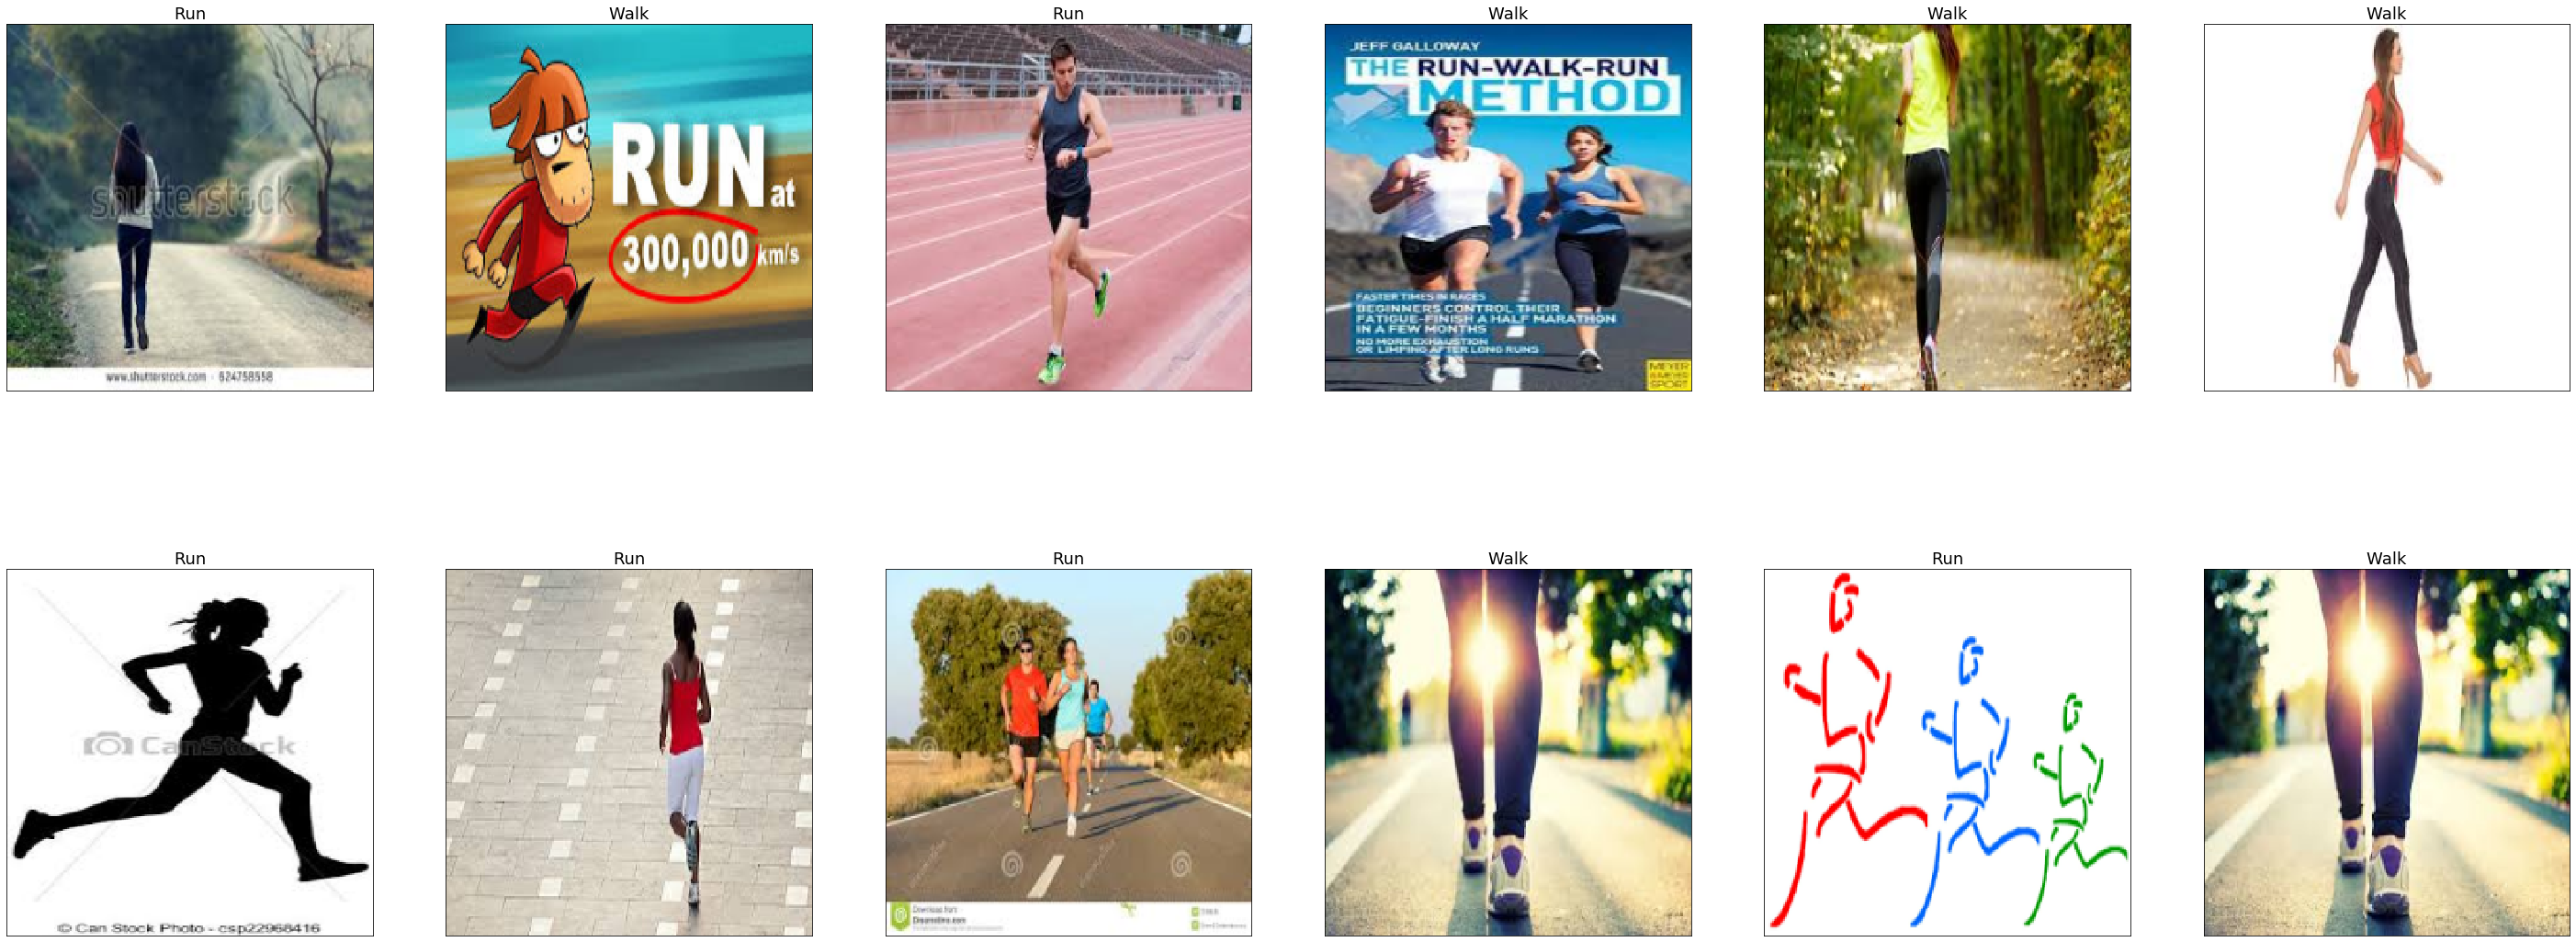

In [12]:
img_numbers = []
str_label = []
for data in (test_data[:12]):
    img_numbers.append(data[1])
    
    img_data = data[0]
    img_data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
    
    model_out = model.predict([img_data])[0]
    
    if np.argmax(model_out) == 1: str_label.append('Walk')
    else: str_label.append('Run')
    
img_plt(str_label)